In [75]:
%pylab inline
from astropy import units as u
from astropy import constants
import biff

Populating the interactive namespace from numpy and matplotlib


## Constants

In [95]:
# Gravitational constants
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

# Scale lengths
r_sLMC = 30.0
r_sMW = 40.85

# Potential From N-body simulations to units of *** 
pot_factor = G_c/43007.1*1E10 




4.51835939627e-39 kpc3 / (s2 solMass)


In [153]:
# Orbit of the N-body LMC-MW simulation
lmc_orbit = np.loadtxt('../LMC_orbit/orbits/LMC6_H1.txt')
#! head -1 ../LMC_orbit/orbits/LMC6_H1.txt

# Initial position of LMC
x_lmc_i = lmc_orbit[0,2]
y_lmc_i = lmc_orbit[0,3]
z_lmc_i = lmc_orbit[0,4]

print x_lmc_i, y_lmc_i, z_lmc_i

# Present position of LMC
x_lmc_f = lmc_orbit[119,2]
y_lmc_f = lmc_orbit[119,3]
z_lmc_f = lmc_orbit[119,4]

11.579168 247.827392 129.886137


# Computing the potential
## IDEA: 

How to compute the potential from the inner LMC outside the LMC? 

Compute the Snlm Tnlm coefficients of the inner LMC (in wich the lmc is spherical) and compute
the potential in all the positions without taking the inner particles. 

In [2]:
## Code taken from (https://github.com/adrn/biff/blob/master/notebooks/Plummer%20test.ipynb)
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

In [60]:
## Reading the data from MASKING the LMC

LMC_inn = np.loadtxt('../LMC_inn.txt')
LMC_out = np.loadtxt('../LMC_out.txt')
MW = np.loadtxt('../MW.txt')
All_out = np.loadtxt('../All_out.txt')


In [180]:
# Defining the masses of particles and the potential from the N-body simulations!
LMC_inn_M = LMC_inn[:,3]
LMC_inn_pot = LMC_inn[:,4] * pot_factor.value

LMC_out_M = LMC_out[:,3]
LMC_out_pot = LMC_out[:,4] * pot_factor.value

MW_M = MW[:,3]
MW_pot = MW[:,4] * pot_factor.value

All_out_M = All_out[:,3]
All_out_pot = All_out[:,4] * pot_factor.value


<matplotlib.colorbar.Colorbar instance at 0x7f345e38bef0>

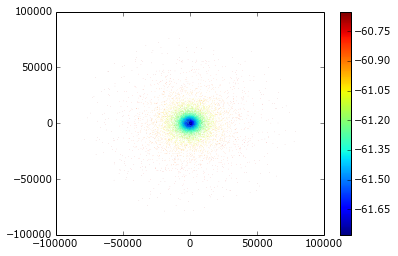

In [181]:
# N-body potential

scatter(All_out_pos[0], All_out_pos[1], edgecolor='none', c=np.log10(np.abs(All_out_pot)), s=0.1)
scatter(LMC_inn_pos[0], LMC_inn_pos[1], edgecolor='none', c=np.log10(np.abs(LMC_inn_pot)), s=0.1)
colorbar()
#xlim(-500, 500)
#ylim(-500, 500)

In [160]:
LMC_inn_pos = np.array([LMC_inn[:,0], LMC_inn[:,1], LMC_inn[:,2]])
LMC_inn_pos_cm = np.array([LMC_inn[:,0]-x_lmc_i, LMC_inn[:,1]-y_lmc_i, LMC_inn[:,2]-z_lmc_i])

LMC_out_pos = np.array([LMC_out[:,0], LMC_out[:,1], LMC_out[:,2]])
All_out_pos = np.array([All_out[:,0], All_out[:,1], All_out[:,2]])
All_out_pos_lmccm = np.array([All_out[:,0]-x_lmc_i, All_out[:,1]-y_lmc_i, All_out[:,2]-z_lmc_i])

MW_pos = np.array([MW[:,0], MW[:,1], MW[:,2]])
MW_pos_lmccm = np.array([MW[:,0]-x_lmc_i, MW[:,1]-y_lmc_i, MW[:,2]-z_lmc_i])

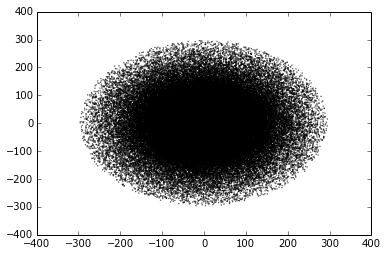

In [155]:
scatter(LMC_inn_pos_cm[0], LMC_inn_pos_cm[1], s=0.1, c='k')

(-500, 500)

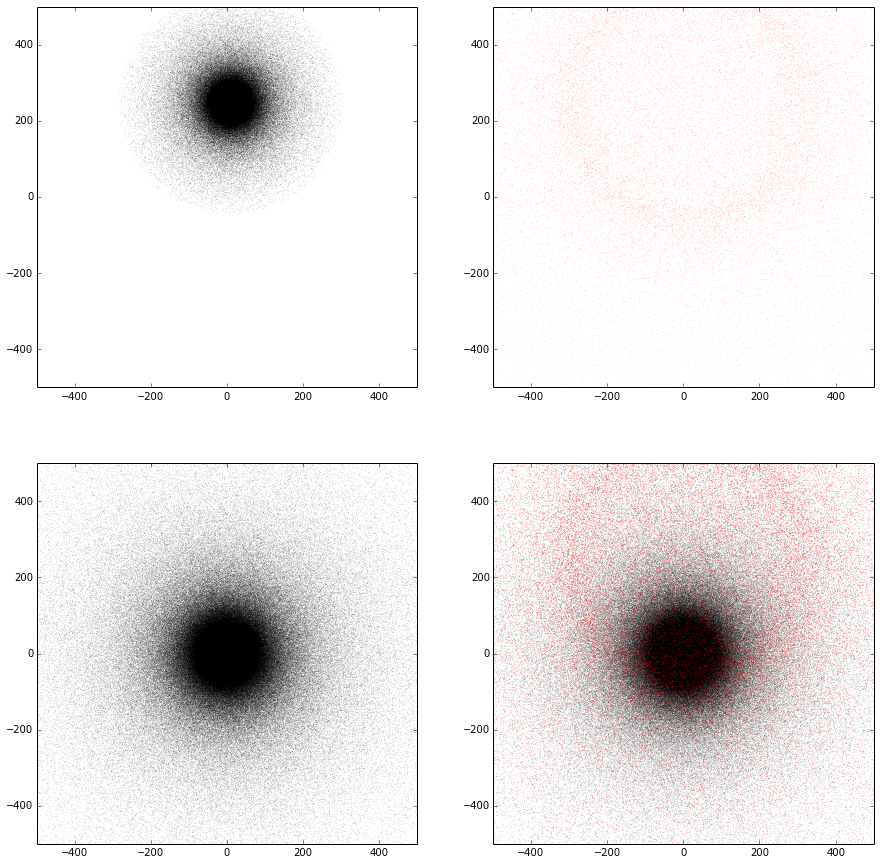

In [138]:
figure(figsize=(15,15))

subplot(2, 2, 1)
scatter(LMC_inn_pos[0], LMC_inn_pos[1], s=0.1, edgecolor='none', c='k')
xlim(-500, 500)
ylim(-500, 500)

subplot(2, 2, 2)
scatter(LMC_out_pos[0], LMC_out_pos[1], s=0.1, edgecolor='none', c='r')
xlim(-500, 500)
ylim(-500, 500)

subplot(2, 2, 3)
scatter(MW_pos[0], MW_pos[1], s=0.1,edgecolor='none', c='k')
xlim(-500, 500)
ylim(-500, 500)

subplot(2, 2, 4)
scatter(MW_pos[0], MW_pos[1], s=0.1,edgecolor='none', c='k')
scatter(LMC_out_pos[0], LMC_out_pos[1], s=0.3, edgecolor='none', c='r')
xlim(-500, 500)
ylim(-500, 500)



In [102]:
## Potential of the MW on the MW particles..

MW_M = MW_M.astype(np.double)
Snlm_MW, Tnlm_MW, nlms_MW = STnlm(np.ascontiguousarray(MW_pos.T), MW_M, r_sMW, 10, 0)
pot_MW_MW = biff.potential(np.ascontiguousarray(MW_pos.T), Snlm_MW, Tnlm_MW, 10, 0, G_c.value, MW_M[0], r_sMW)

In [103]:
## Potential of the MW on the inner LMC particles..

MW_M = MW_M.astype(np.double)
pot_MW_LMC = biff.potential(np.ascontiguousarray(LMC_inn_pos.T), Snlm_MW, Tnlm_MW, 10, 0, G_c.value, MW_M[0], r_sMW)

In [108]:
print np.max(np.abs(pot_MW_MW))
print np.max(np.abs(pot_MW_LMC))

2.76286455237e-44
2.45905596102e-44


<matplotlib.colorbar.Colorbar instance at 0x7f345c936d40>

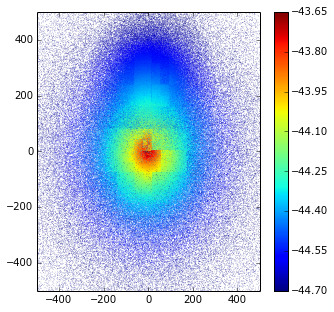

In [166]:
figure(figsize=(5,5))
scatter(MW_pos[0], MW_pos[1], c=np.log10(np.abs(pot_MW_MW)), edgecolor='none'
        ,s=0.2, vmin=-44.7,vmax=-43.65)
scatter(LMC_inn_pos[0], LMC_inn_pos[1], c=np.log10(np.abs(pot_MW_LMC)), edgecolor='none'
        ,s=0.2, vmin=-44.7,vmax=-43.65)

xlim(-500, 500)
ylim(-500, 500)
colorbar()

In [96]:
print pot_MW_out[0] 
print MW_pot[0] * pot_factor

-1.39605276836e-47
-2.61471902963e-59 kpc3 / (s2 solMass)


In [161]:
# Potential of the LMC on the LMC particles

LMC_inn_M = LMC_inn_M.astype(np.double)
Snlm_LMC, Tnlm_LMC, nlms_LMC = STnlm(np.ascontiguousarray(LMC_inn_pos_cm.T), LMC_inn_M, r_sLMC, 10, 0)
pot_LMC_LMC = biff.potential(np.ascontiguousarray(LMC_inn_pos_cm.T), Snlm_LMC, Tnlm_LMC, 10, 0, G_c.value, LMC_inn_M[0], r_sLMC)
pot_LMC_MW = biff.potential(np.ascontiguousarray(MW_pos_lmccm.T), Snlm_LMC, Tnlm_LMC, 10, 0, G_c.value, LMC_inn_M[0], r_sLMC)

(-1000, 1000)

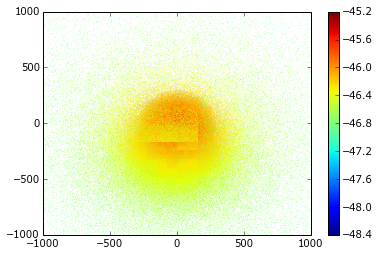

In [165]:
scatter(LMC_inn_pos_cm[0], LMC_inn_pos_cm[1], c=np.log10(np.abs(pot_LMC_LMC)), edgecolor='none'
        ,s=0.2, vmin=-48.4, vmax=-45.2)
scatter(MW_pos_lmccm[0], MW_pos_lmccm[1], c=np.log10(np.abs(pot_LMC_MW)), edgecolor='none'
        ,s=0.2, vmin=-48.4, vmax=-45.2)
colorbar()
xlim(-1000, 1000)
ylim(-1000, 1000)

In [167]:
# Total potential!!

LMC_inn_pot_t = pot_LMC_LMC + pot_MW_LMC
MW_pot_t = pot_MW_MW + pot_LMC_MW

(-500, 500)

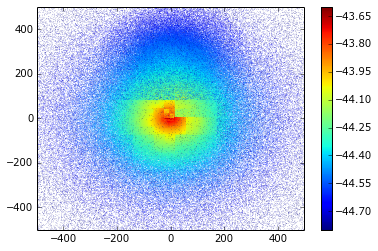

In [171]:
# Comming back to the 0,0,0 point

scatter(LMC_inn_pos[0], LMC_inn_pos[1], c=np.log10(np.abs(LMC_inn_pot_t)), edgecolor='none'
        ,s=0.2, vmin=-44.8, vmax=-43.6)

scatter(MW_pos[0], MW_pos[1], c=np.log10(np.abs(MW_pot_t)), edgecolor='none'
       ,s = 0.2, vmin=-44.8, vmax=-43.6)

colorbar()

xlim(-500, 500)
ylim(-500, 500)